**Objective -** The main objective of this project is to build a text classifier using CNN which takes text as the input and predicts the label.

**Dataset details –** The dataset contains 20,000 (Approx) newsgroup documents from 20 different newsgroups. The dataset is of size 46 MB approximately.

**Source -** *https://archive.ics.uci.edu/dataset/113/twenty+newsgroups*

**Research Question –** Convolution Neural Networks are usually used for image processing. So, for this study I am going to analyze if it can also be used for processing text.

**Approach** <br>
*   The data here contains in the form of text files and does not contain any tabular format data.<br>
*	The text documents are first cleaned and processed using python regex which involves removing punctuations, converting non-English words to English etc.,<br>
*	The cleaned text documents are then vectorized.<br>
*	We use pre-trained glove vectors for vectorizing the text.<br>
*	CNN architectures are built and are trained using the above vectorized documents.<br>
*	Results are evaluated for the train, test datasets.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()

'/Users/sri/Downloads/Project_606/CNN_Preprocessing'

In [ ]:
!unzip /Users/sri/Downloads/Project_606/CNN_Preprocessing/Documents.zip

In [4]:
PATH = r"/Users/sri/Downloads/Project_606/CNN_Preprocessing/20_newsgroups/"
dirs = os.listdir(PATH)

In [5]:
#extracting the class labels from the file paths to check its value counts.

dirs_labels = []
for root, dirs, files in os.walk(PATH,topdown=False):
      for name in sorted(files):
            a = os.path.join(root,name).split('/')[-2]
            
            dirs_labels.append(a)

In [7]:
len(dirs_labels)

19997

There are 19997 documents in the dataset.

In [9]:
list(np.unique(np.array(dirs_labels)))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

There are a total of 20 unique class labels as shown above.

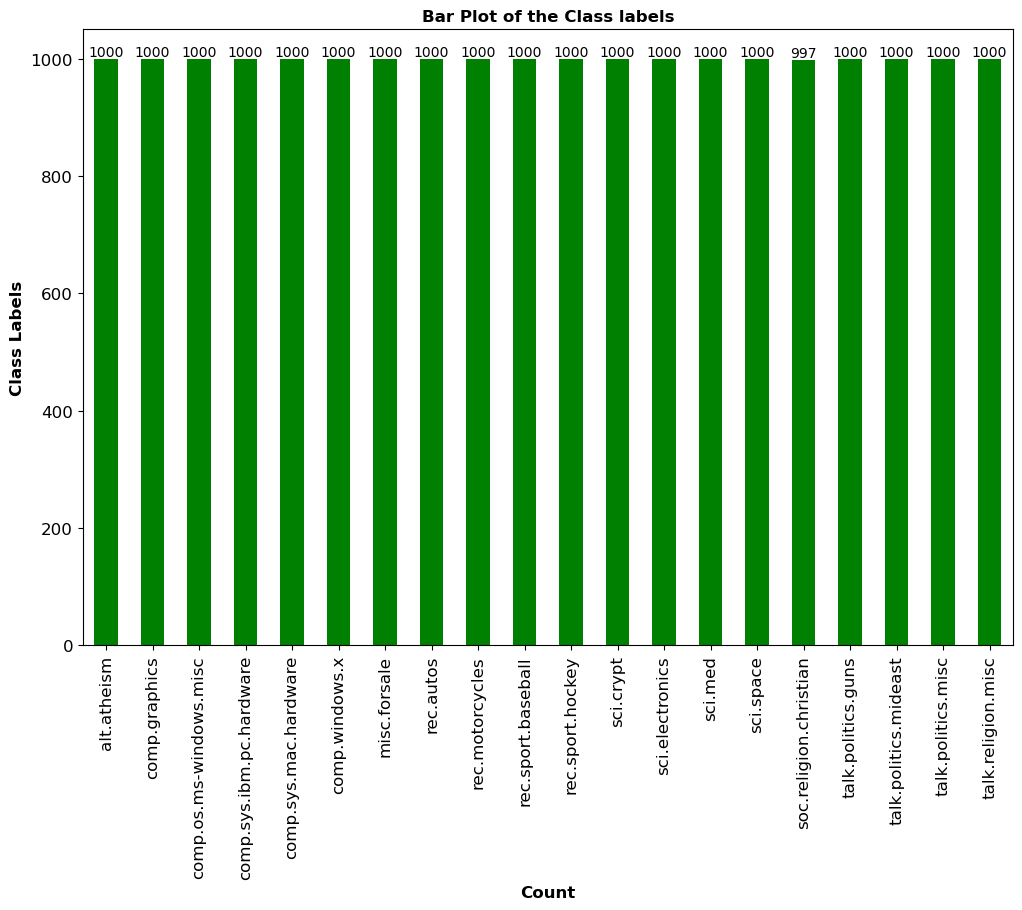

In [10]:
#Bar chart showing the counts of each class label

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax = pd.Series(dirs_labels).value_counts().sort_index().plot(kind='bar',color='green')

for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='edge')

plt.xticks(rotation = 90)    
plt.title("Bar Plot of the Class labels",fontweight='bold')
plt.xlabel("Count",fontsize=12,fontweight='bold')
plt.ylabel("Class Labels",fontsize=12,fontweight='bold')
plt.show()

**Observations:**<br>
From the above bar chart it is clear that<br>
* All the class labels has equal number of documents except for the soc.religion.christian class label.<br>
* soc.religion.christian class label has 997 documents while all the other class labels have 1000 documents.<br>
* We can say that the dataset is almost balanced one.

Figure 2

In [14]:
# Line chart showing the file size of the documents.

file_size = []
for root, dirs, files in os.walk(PATH, topdown=False):
  for name in files:
    x = os.path.join(root, name)
    file_size.append(os.path.getsize(x))

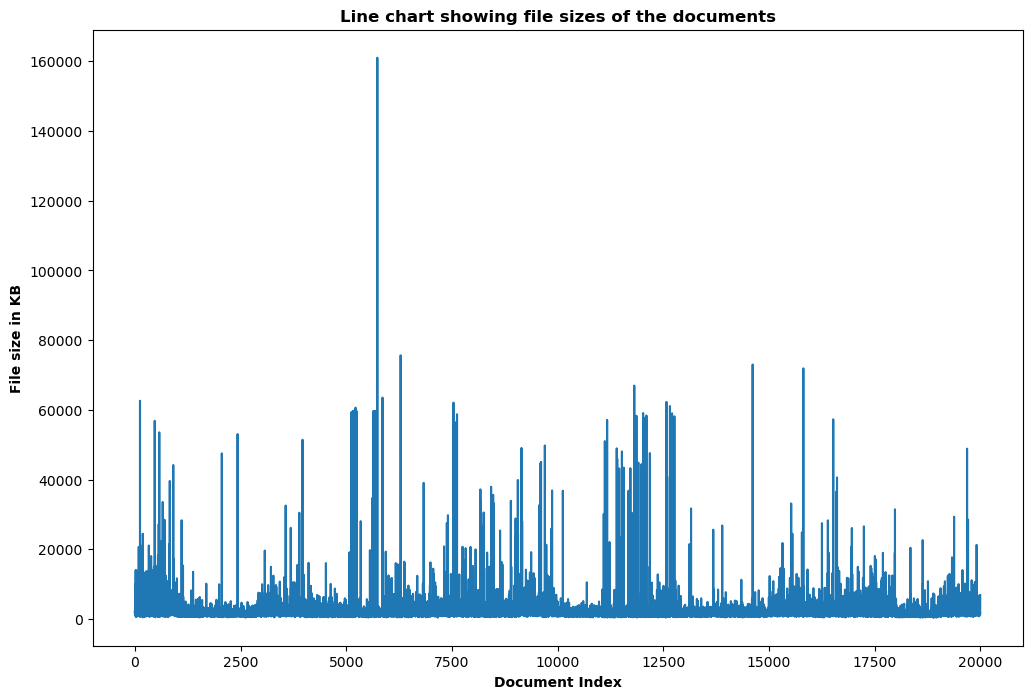

In [15]:
plt.figure(figsize=(12, 8))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.title("Line chart showing file sizes of the documents",fontweight='bold')
plt.ylabel("File size in KB",fontsize=10,fontweight='bold')
plt.xlabel("Document Index",fontsize=10,fontweight='bold')
plt.plot(file_size)
plt.show()

**Observations:**<br>
From the above line chart it can be observed that the <br>
* Most of the documents have file size of less than 20000 bytes.<br>
* The maximum file size is observed to be 160000 bytes.

* Data source - *https://archive.ics.uci.edu/dataset/113/twenty+newsgroups* <br>

* Data size (MB, GB, etc.) - 46 MB approx.<br>
* Data shape (# of rows and # columns) - It does not contain data in the form of rows and columns rather data is present in the form text files (.txt format)<br>